# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  2575k      0  0:00:35  0:00:35 --:--:-- 3542k    0  2321k      0  0:00:39  0:00:25  0:00:14 2825k
total 776
-rw-r--r--     1 alexandreperdomo  staff       0 Jun 29 09:13 README.md
-rw-r--r--@    1 alexandreperdomo  staff  395882 Jun 30 12:01 image_denoising.ipynb
drwx------  1087 alexandreperdomo  staff   34784 Jun  9 15:06 paintings
drwxr-xr-x     8 alexandreperdomo  staff     256 Jun 30 11:30 tests


In [2]:
import glob

In [3]:
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

In [5]:
# YOUR CODE HERE
im = Image.open(dataset_paths[53])
im.show()

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [6]:
img = cv2.imread(dataset_paths[53])
dimensions = img.shape
dimensions

(614, 517, 3)

In [7]:
width, height = im.size
print(width, height)

517 614


In [8]:
img_shape = (614, 517, 3)
img_dim = 3

❓ **What was in the image above?**

In [9]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [10]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [11]:
dataset_images = []
for dataset_path in dataset_paths:
    data_image = cv2.imread(dataset_path)
    dataset_images.append(data_image)

In [12]:
assert len(dataset_images) == len(dataset_paths)
assert isinstance(dataset_images[0], np.ndarray)

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [13]:
for image in dataset_images:
    print(image.shape)

(358, 434, 3)
(627, 604, 3)
(484, 307, 3)
(484, 352, 3)
(461, 614, 3)
(480, 626, 3)
(614, 467, 3)
(401, 479, 3)
(600, 450, 3)
(425, 618, 3)
(639, 381, 3)
(614, 463, 3)
(362, 480, 3)
(322, 384, 3)
(474, 614, 3)
(484, 368, 3)
(556, 614, 3)
(427, 614, 3)
(489, 614, 3)
(419, 614, 3)
(614, 449, 3)
(653, 261, 3)
(480, 317, 3)
(614, 469, 3)
(234, 312, 3)
(270, 181, 3)
(360, 273, 3)
(424, 300, 3)
(660, 520, 3)
(1229, 911, 3)
(787, 510, 3)
(299, 218, 3)
(573, 561, 3)
(971, 1214, 3)
(526, 343, 3)
(1229, 833, 3)
(586, 789, 3)
(360, 418, 3)
(742, 597, 3)
(614, 292, 3)
(466, 394, 3)
(482, 480, 3)
(461, 334, 3)
(614, 380, 3)
(1229, 757, 3)
(600, 398, 3)
(670, 900, 3)
(461, 326, 3)
(253, 173, 3)
(480, 346, 3)
(614, 457, 3)
(614, 422, 3)
(615, 427, 3)
(614, 517, 3)
(361, 480, 3)
(347, 540, 3)
(614, 489, 3)
(515, 768, 3)
(365, 480, 3)
(600, 535, 3)
(1010, 1536, 3)
(629, 630, 3)
(842, 1229, 3)
(960, 682, 3)
(801, 610, 3)
(445, 337, 3)
(484, 326, 3)
(365, 480, 3)
(284, 600, 3)
(614, 244, 3)
(288, 184, 3)

In [14]:
# Toutes les images ont le même nombre de dimensions (3). Les longeurs et largeurs varient.
# Les images pourraient être de dimensions différentes car certaines sont en noir et blanc. 
# L'import avec cv2 a peut être automatiquement généré une troisième dimension.

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [15]:
from tqdm import tqdm

In [16]:
dataset_images_black_white = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 933884.64it/s]


{3}

In [17]:
assert dataset_images == dataset_images_black_white
# Vérification de l'hypothèse faite plus haut, les 2 éléments étant identiques, 
# la conversion en 3 dimensions a du être faite automatiquement.
# Par sécurité, la méthode est quand même appliquée sur le dataset_images

In [18]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1076352.85it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [19]:
for image in dataset_images:
    print(image.shape)

(358, 434, 3)
(627, 604, 3)
(484, 307, 3)
(484, 352, 3)
(461, 614, 3)
(480, 626, 3)
(614, 467, 3)
(401, 479, 3)
(600, 450, 3)
(425, 618, 3)
(639, 381, 3)
(614, 463, 3)
(362, 480, 3)
(322, 384, 3)
(474, 614, 3)
(484, 368, 3)
(556, 614, 3)
(427, 614, 3)
(489, 614, 3)
(419, 614, 3)
(614, 449, 3)
(653, 261, 3)
(480, 317, 3)
(614, 469, 3)
(234, 312, 3)
(270, 181, 3)
(360, 273, 3)
(424, 300, 3)
(660, 520, 3)
(1229, 911, 3)
(787, 510, 3)
(299, 218, 3)
(573, 561, 3)
(971, 1214, 3)
(526, 343, 3)
(1229, 833, 3)
(586, 789, 3)
(360, 418, 3)
(742, 597, 3)
(614, 292, 3)
(466, 394, 3)
(482, 480, 3)
(461, 334, 3)
(614, 380, 3)
(1229, 757, 3)
(600, 398, 3)
(670, 900, 3)
(461, 326, 3)
(253, 173, 3)
(480, 346, 3)
(614, 457, 3)
(614, 422, 3)
(615, 427, 3)
(614, 517, 3)
(361, 480, 3)
(347, 540, 3)
(614, 489, 3)
(515, 768, 3)
(365, 480, 3)
(600, 535, 3)
(1010, 1536, 3)
(629, 630, 3)
(842, 1229, 3)
(960, 682, 3)
(801, 610, 3)
(445, 337, 3)
(484, 326, 3)
(365, 480, 3)
(284, 600, 3)
(614, 244, 3)
(288, 184, 3)

In [20]:
from tensorflow.image import resize

In [21]:
dataset_images_resized = []
for image in dataset_images:
    image_resized = resize(image, [120,100], method='nearest')
    dataset_images_resized.append(image_resized)
dataset_resized = np.array(dataset_images_resized)

In [22]:
assert isinstance(dataset_resized, np.ndarray)
assert dataset_resized.shape == (len(dataset_paths), 120,100,3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [23]:
dataset_scaled = dataset_resized / 255.0

In [24]:
dataset_scaled.shape

(1085, 120, 100, 3)

In [25]:
np.amax(dataset_scaled)

1.0

In [26]:
np.amin(dataset_scaled)

0.0

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [27]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

In [28]:
# YOUR CODE HERE
image_array = dataset_noisy[53]*255
img = Image.fromarray(image_array, 'RGB')
print(image_array.shape)
print(np.amax(image_array))
img.show()

(120, 100, 3)
255.0


In [29]:
img = Image.fromarray(dataset_resized[53], 'RGB')
print(dataset_resized[53].shape)
print(np.amax(dataset_resized))
img.show()

(120, 100, 3)
255


❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_resized, test_size=0.2)


In [32]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

In [33]:
# Pour permettre de comparer les données obtenues et celles chargées, 
# il pourrait être bien de fixer un random_state dans le train_test_split.
# Les élèves pourraient montrer qu'ils savent comparer des données (comme ci dessous),
# et cela leur laisse la possibilité de continuer si ils n'ont pas réussi.

In [34]:
# assert (X_train == X_train_loaded).all()

In [50]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  298M  100  298M    0     0  3340k      0  0:01:31  0:01:31 --:--:-- 3775k.1M    0     0  2590k      0  0:01:57  0:00:07  0:01:50 2769k


### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [51]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [52]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [54]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = Sequential(name='encoder')
encoder.add(layers.InputLayer(input_shape=(120, 100, 3)))
encoder.add(layers.Conv2D(32, (3,3), padding='same', activation="relu"))
encoder.add(layers.MaxPool2D(pool_size=(2,2)))
encoder.add(layers.Conv2D(16, (2,2), padding='same', activation="relu"))
encoder.add(layers.MaxPool2D(pool_size=(2,2)))
encoder.add(layers.Flatten())
encoder.add(layers.Dense(50, activation='relu'))
encoder.add(layers.Dense(6000, activation="softmax"))
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 120, 100, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 50, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 50, 16)        2064      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 25, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                600050    
_________________________________________________________________
dense_3 (Dense)              (None, 6000)              3060

👉 **Test your encoder below**

In [55]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              909010    
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 915,685
Trainable params: 915,685
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [56]:
score_baseline = 0

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5)

In [62]:
autoencoder.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])
history = autoencoder.fit(X_train, Y_train,
          validation_split=0.3,
          batch_size=16, epochs=20, callbacks=[es]);

Epoch 1/50
38/38 [==============================] - 16s 357ms/step - loss: 0.0728 - accuracy: 0.7228 - val_loss: 0.0749 - val_accuracy: 0.7011
Epoch 2/50
38/38 [==============================] - 14s 356ms/step - loss: 0.0763 - accuracy: 0.7062 - val_loss: 0.0735 - val_accuracy: 0.7012
Epoch 3/50
38/38 [==============================] - 14s 358ms/step - loss: 0.0748 - accuracy: 0.7105 - val_loss: 0.0734 - val_accuracy: 0.7011
Epoch 4/50
38/38 [==============================] - 14s 379ms/step - loss: 0.0724 - accuracy: 0.6980 - val_loss: 0.0729 - val_accuracy: 0.7010
Epoch 5/50
38/38 [==============================] - 14s 362ms/step - loss: 0.0715 - accuracy: 0.6916 - val_loss: 0.0728 - val_accuracy: 0.7006
Epoch 6/50
38/38 [==============================] - 14s 375ms/step - loss: 0.0730 - accuracy: 0.7187 - val_loss: 0.0730 - val_accuracy: 0.7006
Epoch 7/50
38/38 [==============================] - 15s 385ms/step - loss: 0.0720 - accuracy: 0.7213 - val_loss: 0.0725 - val_accuracy: 0.7002

❓ **Plot your training and validation loss at each epoch using the cell below**

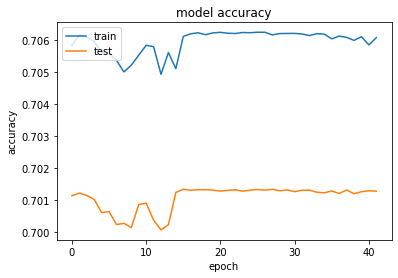

In [63]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
fig.savefig("tests/history_accuracy.png")

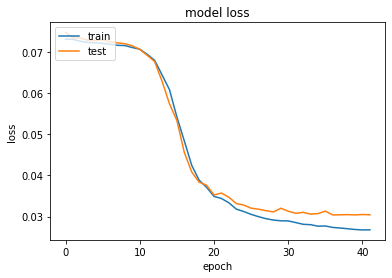

In [64]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
fig.savefig("tests/history_loss.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [65]:
Y_pred = autoencoder.predict(X_test)

In [66]:
res = autoencoder.evaluate(X_test, Y_test, verbose=0)
res

[0.02971741184592247, 0.7250161170959473]

In [67]:
score_test = res[1]
score_test

0.7250161170959473

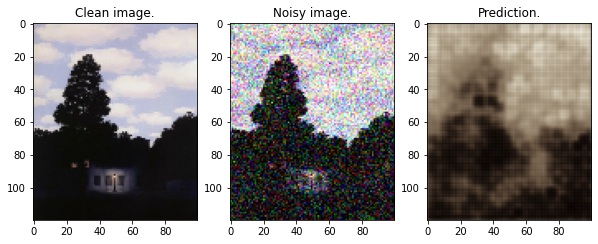

In [68]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [48]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()